In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import openpyxl

path = "D:\MFK 5\TEMP"
file_list = glob.glob(path + "/*.xlsx")
excl_list = []
for file in file_list:
    df = pd.read_excel(file)
    excl_list.append(pd.read_excel(file))
    excl_merged = pd.concat(excl_list, ignore_index=True)
    print(excl_merged)
# excl_merged.to_excel("D:\MFK 5\TEMP\Prelable_Report.xlsx")


In [22]:

##################  Summary ######################
# grouped = excl_merged.groupby(['Prelabel', 'Prelabel Availabilty']).size().unstack(fill_value=0)
grouped = excl_merged.groupby(['Prelabel', 'Prelabel Availabilty']).size().unstack(fill_value=0)
grouped.rename(columns={'No': 'Prelabel Availabilty_No','Yes': 'Prelabel Availabilty_Yes'}, inplace = True)
grouped.reset_index(inplace=True)
grouped


Prelabel Availabilty,Prelabel,Prelabel Availabilty_No,Prelabel Availabilty_Yes
0,CITY_ENTRANCE,52,48
1,CITY_EXIT,7,93
2,CL_CLOUDY,5,95
3,ENV_SHADOWS,13,87
4,EV_ANIMAL_COMMON,22,19
5,EV_EMERGENCY,16,84
6,EV_TAILLIGHT_SINGLE,0,26
7,FG_FOG,40,60
8,LANE_CHANGE,0,100
9,LANE_ENTRY,46,54


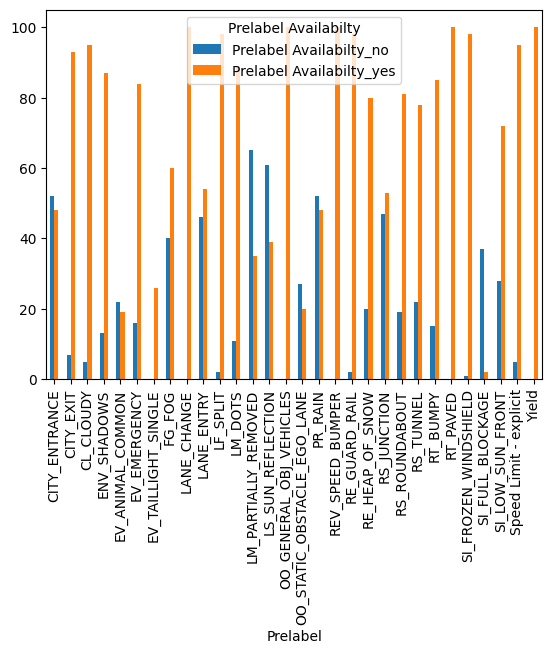

In [58]:
# col = excl_merged["Prelabel"].unique()
# Yes_list = []
# No_list = []
# for value in col:
#     excl_df = excl_merged[excl_merged["Prelabel"] == value]
#     #########    Yes-Section   #############
#     new_df = excl_df[excl_df["Prelabel Availabilty"]=="Yes"]
#     cou_yes = new_df["Prelabel Availabilty"].count()
#     Yes_list.append(cou_yes)
#     ##########   No-section ##############
#     new_df = excl_df[excl_df["Prelabel Availabilty"]=="No"]
#     cou_no = new_df["Prelabel Availabilty"].count()
#     No_list.append(cou_no)
# summary_df = pd.DataFrame({'Prelabel': col,'Yes': Yes_list,'No': No_list})

################## GA_Report  and   Merge     #############
df_GA =pd.read_csv(r"D:\MFK 5\General MFK5\GA_PreLable_Verification\GA_Report.csv")
res= df_GA.merge(excl_merged, how='left')
res.dropna(subset = ['Prelabel'], inplace=True,ignore_index=True)
with pd.ExcelWriter("GA_Prelable_Analysis_Report.xlsx") as writer:
    res.to_excel(writer, sheet_name="Analysis_report")  
    grouped.to_excel(writer, sheet_name="Summary")  

######### plot ####################
plt = grouped.plot( x = "Prelabel", kind = 'bar')
plt.figure.savefig('Prelable_Plot.jpg',bbox_inches='tight', dpi=180)
wb = openpyxl.load_workbook("GA_Prelable_Analysis_Report.xlsx")
sh = wb.create_sheet('Plot_sheet')
img = openpyxl.drawing.image.Image("Prelable_Plot.jpg")
sh.add_image(img, 'B2')
wb.save("GA_Prelable_Analysis_Report.xlsx")
wb.close()


